# Ford GoBike System Data Project
## by Ignatius Ebigwai

## Investigation Overview

> The aim of this investigation is to identify which demograph the GoBike service appeals to. This study is based on factors such as age, gender, user type, distance, and duration of rides.




## Dataset Overview

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area from 1st Feb 2019 to 1st March 2019. The dataset is a public dataset and can be found at
https://www.google.com/url?q=https://www.fordgobike.com/system-data&sa=D&ust=1554484977399000 with feature
such as bike_id, start and end station, start and end station Id, start and end coordinates etc.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopy.distance
import math
from datetime import datetime, date


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading the saved clean dataset so as to exclude exploratory analysis
bike_clean = pd.read_csv('bike_clean.csv')

### Investigation Period

The period under investigation is one month, that is February 2019

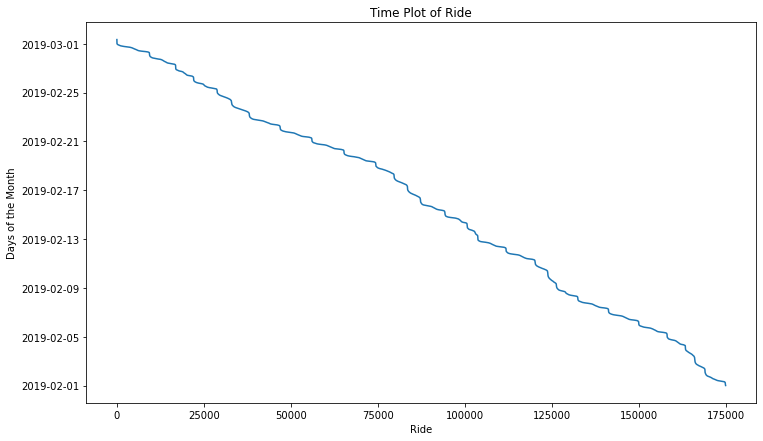

In [3]:
# converting columns in object dtype to datetime dtype
bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])
bike_clean['end_time'] = pd.to_datetime(bike_clean['end_time'])

# line plot of the bike ride
bike_clean.end_time.plot(kind ='line', figsize=(12,7));

# labeling the plot
plt.ylabel('Days of the Month')
plt.xlabel('Ride')
plt.title('Time Plot of Ride');

### Week days with Most Rides

Thursdays, Tuesdays and Wednesdays respectively are the week days with the most rides, accounting for over 52% of rides. While weekends (Saturday and Sundays ) has the least rides

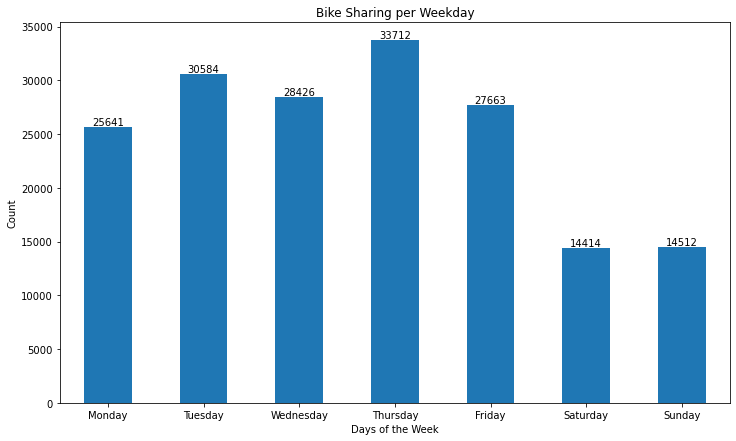

In [4]:
# days with the most bike ride
days_in_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = bike_clean.start_day.value_counts().reindex(days_in_order).plot(kind='bar', figsize=(12,7), rot=0)
plt.xlabel('Days of the Week')
plt.ylabel('Count')
plt.title('Bike Sharing per Weekday');

for container in ax.containers:
    ax.bar_label(container)

### Age Distribution

Age distribution is unimodal and we see more riders within the ages of 25 and 45 with the most being between 30 and 40

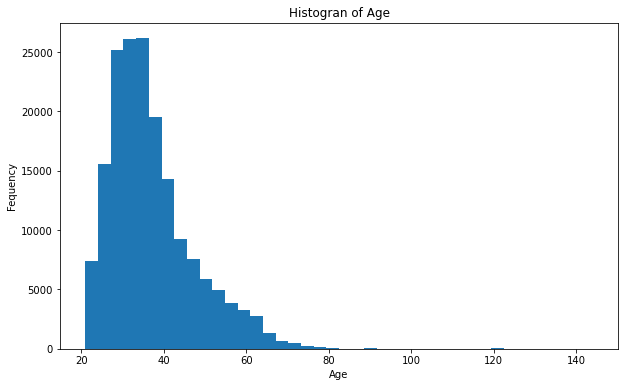

In [5]:
# histogram of the age group
plt.figure(figsize=(10,6))
plt.hist(data = bike_clean, x = 'age', bins=40);
#plt.figure(figsize=(8,8))

plt.xlabel('Age')
plt.ylabel('Fequency')
plt.title('Histogran of Age');

### Duration Distribution

Duration distributin is a normal distribution the most duration between 200 and 1000 seconds 


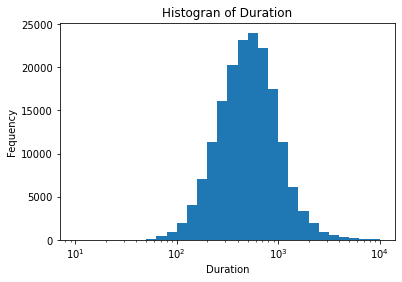

In [6]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(1, 4+0.1, 0.1)
plt.hist(data=bike_clean, x='duration_sec', bins=bins)

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-axis label
plt.xlabel('x-axis limits are changed, and scaled to log-type');

# lebeling the plot
plt.xlabel('Duration')
plt.ylabel('Fequency')
plt.title('Histogran of Duration');

### User Types

Subscribed users are over 150,000 which is over 85% of the riders during the period under review

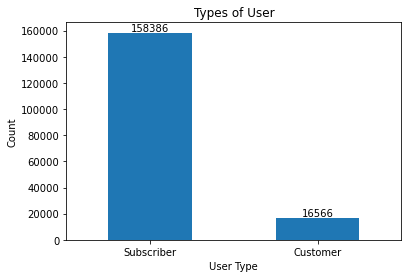

In [7]:
# bar plot of user type
bx = bike_clean.user_type.value_counts().plot(kind='bar', rot=0)

plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Types of User');

for container in bx.containers:
    bx.bar_label(container)

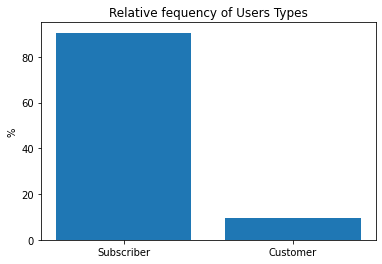

In [8]:
# bar plot of percentage
user_type_series = bike_clean['user_type'].value_counts() / len(bike_clean)
indx = [0,1]
plt.bar(indx, user_type_series*100);

plt.ylabel('%')
plt.title('Relative fequency of Users Types')
plt.xticks(indx, user_type_series.index);

### Riders Gender Percentage

Males rider are over 130,000 which is about 75% of riders in the dataset


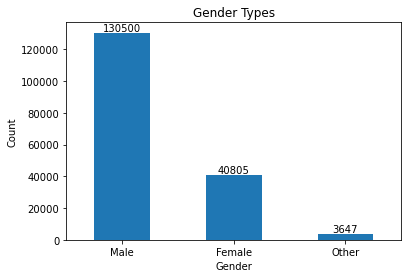

In [9]:
# displaying the genders in the dataset
cx = bike_clean.member_gender.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Types');

for container in cx.containers:
    cx.bar_label(container)

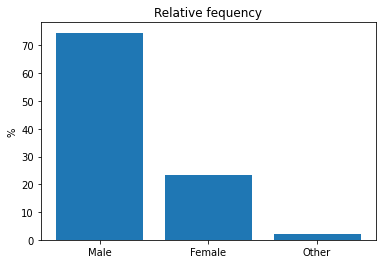

In [10]:
# bar plot of percentage
series = bike_clean['member_gender'].value_counts() / len(bike_clean)
indx = [0,1,2]
plt.bar(indx, series*100)
plt.ylabel('%')
plt.title('Relative fequency')
plt.xticks(indx, series.index);



### Shared Rides
Unshared riders were relatiely higher (over 85%) compared with shared rides.

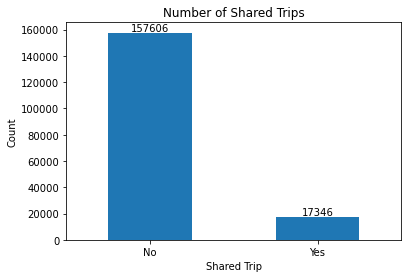

In [11]:
# displaying number of shared  trips
dx = bike_clean.bike_share_for_all_trip.value_counts().plot(kind='bar', rot=0)

plt.xlabel('Shared Trip')
plt.ylabel('Count')
plt.title('Number of Shared Trips');

for container in dx.containers:
    dx.bar_label(container)

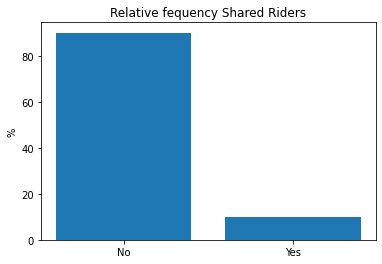

In [12]:

# bar plot of percentage
series = bike_clean['bike_share_for_all_trip'].value_counts() / len(bike_clean)
indx = [0,1]
plt.bar(indx, series*100)
plt.ylabel('%')
plt.title('Relative fequency Shared Riders')
plt.xticks(indx, series.index);



### Relationship Between Age and Gender

There is non-monotonic relationship with age and gender. While the male distribution is bimodal, the female distribution is unimodal and  then to be younger in age of the three category

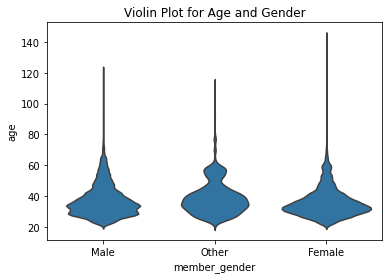

In [13]:
# Violin Plot for Duration and Gender
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='member_gender', y='age', color=base_color, inner=None);

plt.title('Violin Plot for Age and Gender');

### Relationship with Age and Shared Trips

Younger riders shared their trips more compared to older riders

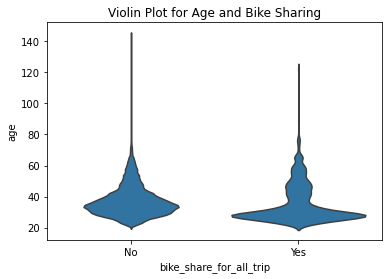

In [14]:
# violin plot for age and bike sharing
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='bike_share_for_all_trip', y='age', color=base_color, inner=None);

plt.title('Violin Plot for Age and Bike Sharing');

### Relations Between Age and Ride Distance

Young riders are seen to embark on longer trips 

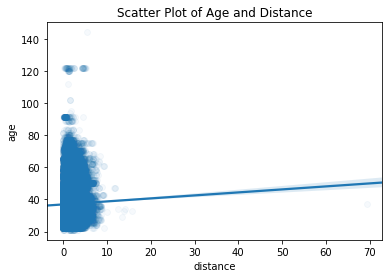

In [15]:
# applying opaqueness to the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data =bike_clean, x = 'distance', y = 'age', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/25});
plt.title('Scatter Plot of Age and Distance');

### Relations Between Age and Ride Duration

Due to the fact that young riders embarked on longer trips. It is seen clearly that those trips actually recorded more time. So young riders spent more time than older riders

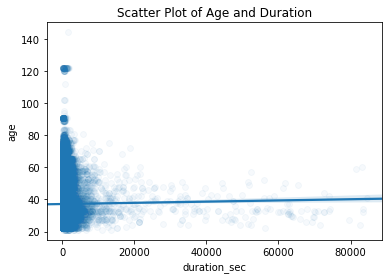

In [16]:
# applying opaqueness to the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data =bike_clean, x = 'duration_sec', y = 'age', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/25});
plt.title('Scatter Plot of Age and Duration');

### Relationship Beyween Age, Distance and Duration of Rides

Younger riders embarked more long trips and also spent more time in their riders

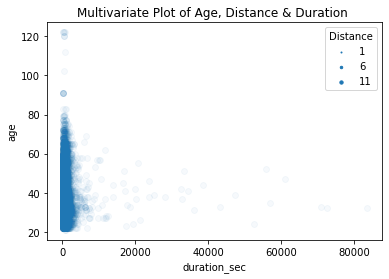

In [17]:
#continuous or numeric data we can use size as marker using 's'


bike_clean_subset = bike_clean.sample(frac=0.1, random_state=1).reset_index(drop=True)

sb.regplot(data = bike_clean_subset, x= 'duration_sec', y = 'age', x_jitter = 0.04, fit_reg = False, scatter_kws={'alpha':1/25})

sizes = [1, 6, 11]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s, color = base_color))
    plt.legend(legend_obj, sizes, title= 'Distance')
    plt.title('Multivariate Plot of Age, Distance & Duration ')
    
    

### Conclusion

In conclusion young riders dominated user of the bike sharing service. They embarked on longer as well as duration. Majority of them are male and they are subscribers

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Ford_GoBike_System_Data_Project.ipynb --to slides --post serve  --no-input --no-prompt